# Predictive Analysis and Customer Segmentation 

In [97]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Bussiness Understanding and Data Collection

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.size

1000

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,41,Female,65,38,35
171,172,Male,28,87,75
48,49,Female,29,40,42
33,34,Male,18,33,92
140,141,Female,57,75,5
59,60,Male,53,46,46
163,164,Female,31,81,93
155,156,Female,27,78,89
27,28,Male,35,28,61
19,20,Female,35,23,98


# Data Cleaning & Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
df.drop_duplicates()
df.shape

(200, 5)

In [13]:
print(df[df['CustomerID']==0].shape[0])

0


In [14]:
print(df[df['Gender']==0].shape[0])

0


In [15]:
print(df[df['Age']==0].shape[0])

0


In [16]:
print(df[df['Annual Income (k$)']==0].shape[0])

0


In [17]:
print(df[df['Spending Score (1-100)']==0].shape[0])

0


In [18]:
df.drop(df.columns[0],axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [19]:
# Encoding categorical variable
cat_values=[]
num_values=[]
for columns in df.columns:
    if df[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        num_values.append(columns)

In [20]:
cat_values

['Gender']

In [21]:
num_values

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# EDA

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

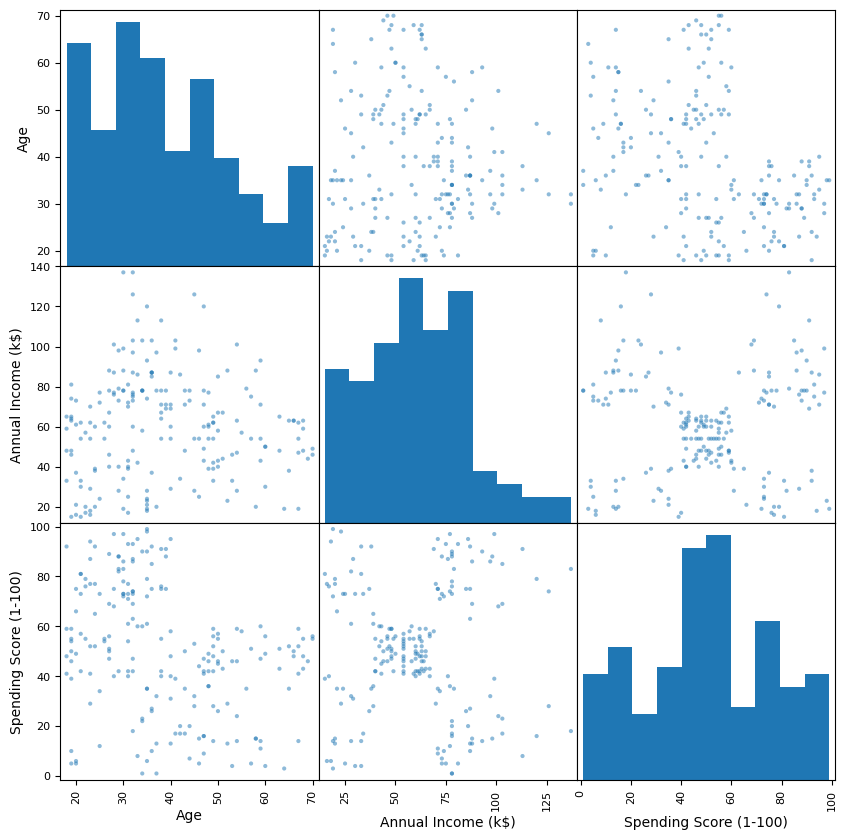

In [22]:
from pandas.plotting import scatter_matrix
df=df.drop('CustomerID',axis=1)
scatter_matrix(df, figsize=(10,10))

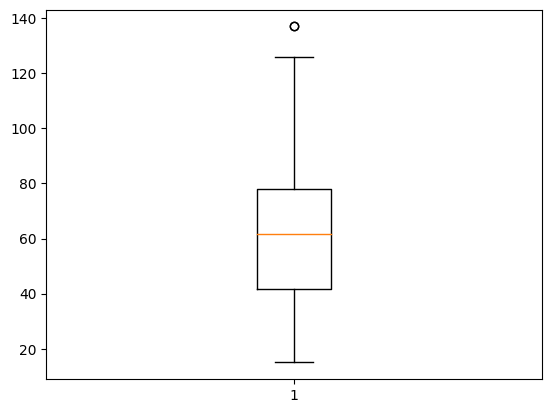

In [23]:

plt.boxplot(df["Annual Income (k$)"])
plt.show()


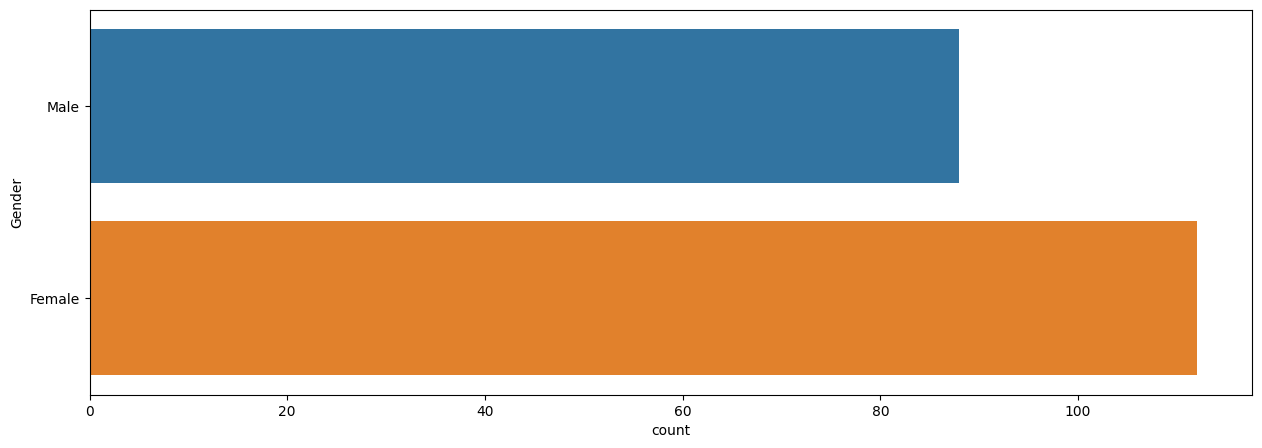

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()


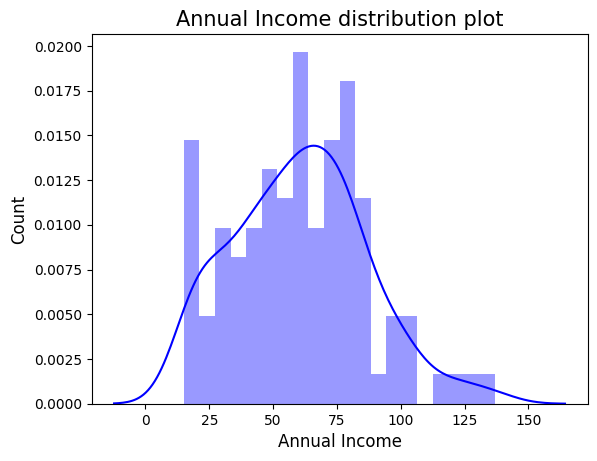

In [80]:
# distribution plot for 'Annual Income'
sns.distplot(df['Annual Income (k$)'],color= 'blue',bins=20)
plt.title('Annual Income distribution plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

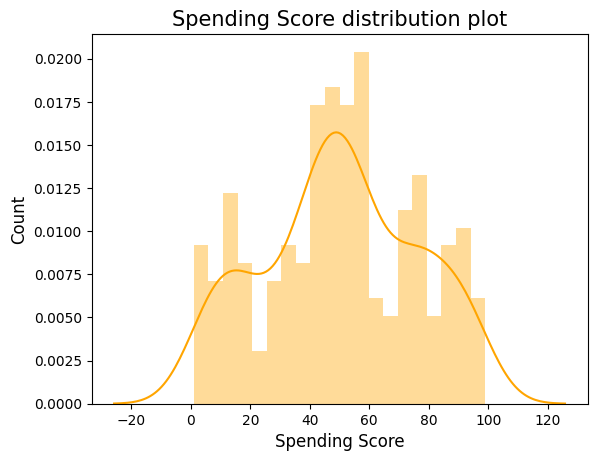

In [76]:
# distribution plot for 'Spending Score'
sns.distplot(df['Spending Score (1-100)'],color= 'orange',bins=20)
plt.title('Spending Score distribution plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

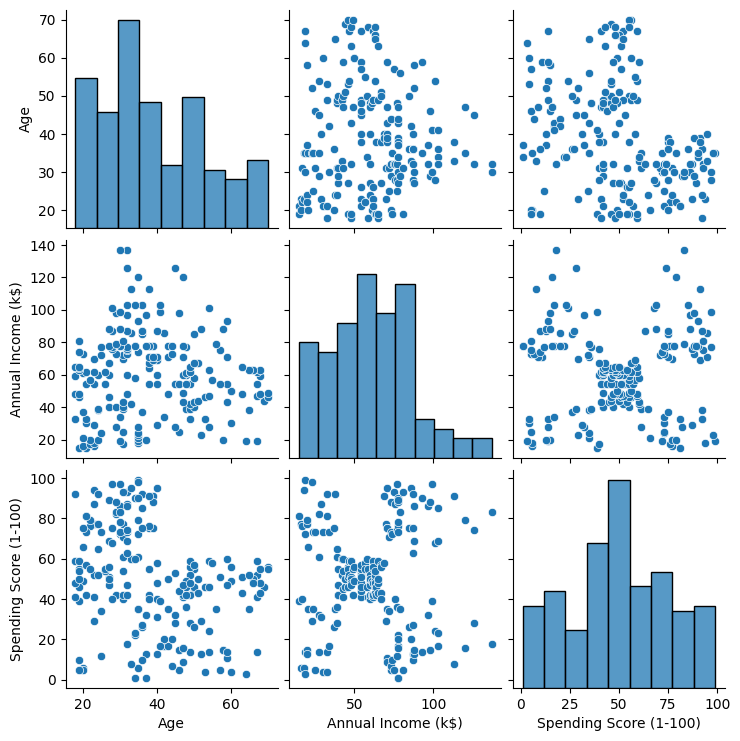

In [25]:

sns.pairplot(df)


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

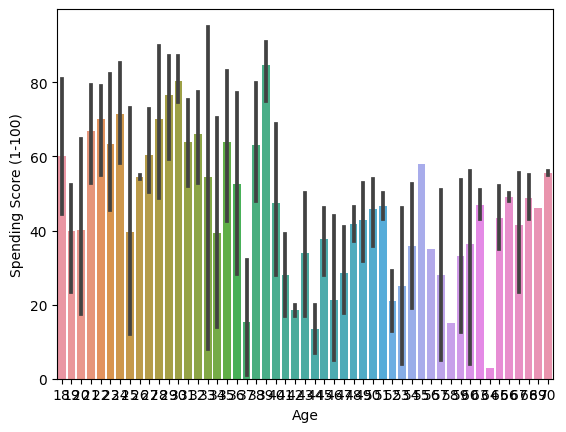

In [26]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=df)

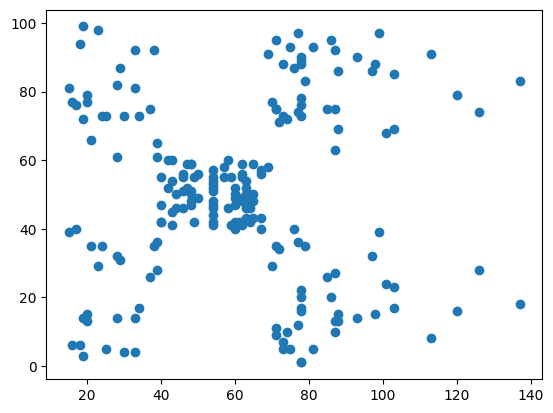

In [27]:
plt.scatter("Annual Income (k$)","Spending Score (1-100)",data=df)
plt.show()


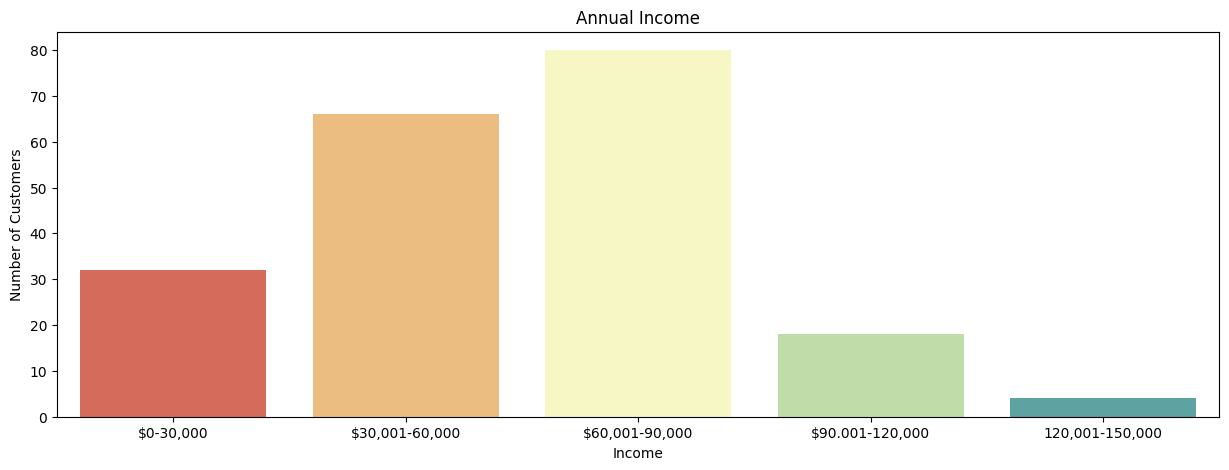

In [28]:
a30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)]
a31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
a61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
a91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120)]
a121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"]<=150)]

ax=["$0-30,000","$30,001-60,000","$60,001-90,000","$90.001-120,000","120,001-150,000"]
ay=[len(a30.values),len(a31_60.values),len(a61_90.values),len(a91_120.values),len(a121_150.values)]

plt.figure(figsize=(15,5))
sns.barplot(x=ax,y=ay,palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

## Feature Engineering and Data Transformation

In [29]:
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [30]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

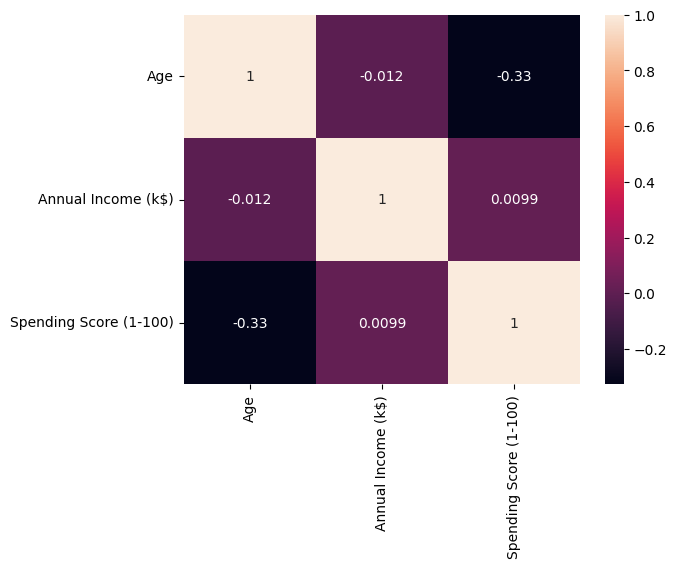

In [32]:
# heatmap to show correlation of various Attributes
sns.heatmap(df.corr(), annot = True)

In [33]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()                               
df['Gender']=LE.fit_transform(df['Gender'])            # 0 indicates male and 1 indicates female
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Predictive Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [37]:
feature_cols=['Age','Spending Score (1-100)']
x=df[feature_cols]


In [39]:
y=df['Annual Income (k$)']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [41]:
x_train

,Age,Spending Score (1-100)
134,20,5
66,43,50
26,45,32
113,19,46
168,36,27
...,...,...
67,68,48
192,33,8
117,49,59
47,27,47


In [42]:
x_test

,Age,Spending Score (1-100)
18,52,29
170,40,13
107,54,46
98,48,42
177,27,69
182,46,15
5,22,76
146,48,36
12,58,15
152,44,20


In [43]:
y_train

134     73
66      48
26      28
113     64
168     87
      ... 
67      48
192    113
117     65
47      40
172     87
Name: Annual Income (k$), Length: 160, dtype: int64

In [44]:
y_test

18      23
170     87
107     63
98      61
177     88
182     98
5       17
146     77
12      20
152     78
61      46
125     70
180     97
154     78
80      54
7       18
33      33
130     71
37      34
74      54
183     98
145     77
45      39
159     78
60      46
123     69
179     93
185     99
122     69
44      39
16      21
55      43
150     78
111     63
22      25
189    103
129     71
4       17
83      54
106     63
Name: Annual Income (k$), dtype: int64

## Linear Regression

In [47]:
linear_R=LinearRegression()
linear_R.fit(x_train,y_train)
y_predicted_train_linear_R=linear_R.predict(x_train)
y_predicted_test_linear_R=linear_R.predict(x_test)
linear_R

LinearRegression()

## Decision tree

In [56]:
tree=DecisionTreeRegressor(random_state=40)
tree.fit(x_train,y_train)
y_predicted_train_tree=tree.predict(x_train)
y_predicted_test_tree=tree.predict(x_test)
tree

DecisionTreeRegressor(random_state=40)

## RandomForest

In [50]:
RFR=RandomForestRegressor(random_state=40)
RFR.fit(x_train,y_train)
y_predicted_train_RFR=RFR.predict(x_train)
y_predicted_test_RFR=RFR.predict(x_test)
RFR

RandomForestRegressor(random_state=40)

# Model Evaluation and Customer Segmentation

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### For Linear regression

In [52]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_linear_R)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_linear_R))

              Training Dataset           
Mean absolute error:      20.69574521802126
Mean squared  error:      689.3737815378199
Root Mean squared error:  26.25592850267954
R2 score:                0.0008125315718325865


In [53]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_linear_R)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_linear_R))

              Testing Dataset           
Mean absolute error:      22.11569101773848
Mean squared  error:      677.3273982602351
Root Mean squared error:  26.02551437071389
R2 score:                -0.007762714823816186


### For Decision Tree

In [57]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_tree))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_tree)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_decision_tree))

              Training Dataset           
Mean absolute error:      0.41875
Mean squared  error:      8.515625
Root Mean squared error:  2.918154382482188
R2 score:                0.9876573405985171


In [58]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_tree))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_tree)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_tree))

              Testing Dataset           
Mean absolute error:      26.275
Mean squared  error:      1218.425
Root Mean squared error:  34.90594505238327
R2 score:                -0.812835696537769


### For Random Forest

In [59]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_RFR))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_RFR)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_RFR))

              Training Dataset           
Mean absolute error:      6.944331249999999
Mean squared  error:      91.10918537743055
Root Mean squared error:  9.5451131673454
R2 score:                0.8679451427863258


In [60]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_RFR))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_RFR)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_RFR))

              Testing Dataset           
Mean absolute error:      20.060062499999997
Mean squared  error:      752.58537078125
Root Mean squared error:  27.433289463373693
R2 score:                -0.11973541649618369


## Accuracy on training and testing set

In [62]:
print(" Accuracy on training data set")
acc_linear_R_train=print(" Accuracy on linear Regression training data set            :  ",linear_R.score(x_train,y_train))
acc_tree_train=print(" Accuracy on decision tree Regressor training data set      :  ",tree.score(x_train,y_train))
acc_RFR_train=print(" Accuracy on Random forest Regressor training data set      :  ",RFR.score(x_train,y_train))

 Accuracy on training data set
 Accuracy on linear Regression training data set            :   0.0008125315718325865
 Accuracy on decision tree Regressor training data set      :   0.9876573405985171
 Accuracy on Random forest Regressor training data set      :   0.8679451427863258


In [63]:
print(" Accuracy on testing data set")
acc_linear_R_test=print(" Accuracy on linear Regression test data set            :  ",linear_R.score(x_test,y_test))
acc_tree_test=print(" Accuracy on decision tree Regressor test data set      :  ",tree.score(x_test,y_test))
acc_RFR_test=print(" Accuracy on Random forest Regressor test data set      :  ",RFR.score(x_test,y_test))

 Accuracy on testing data set
 Accuracy on linear Regression test data set            :   -0.007762714823816186
 Accuracy on decision tree Regressor test data set      :   -0.812835696537769
 Accuracy on Random forest Regressor test data set      :   -0.11973541649618369


## Customer Segmentation

In [67]:

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

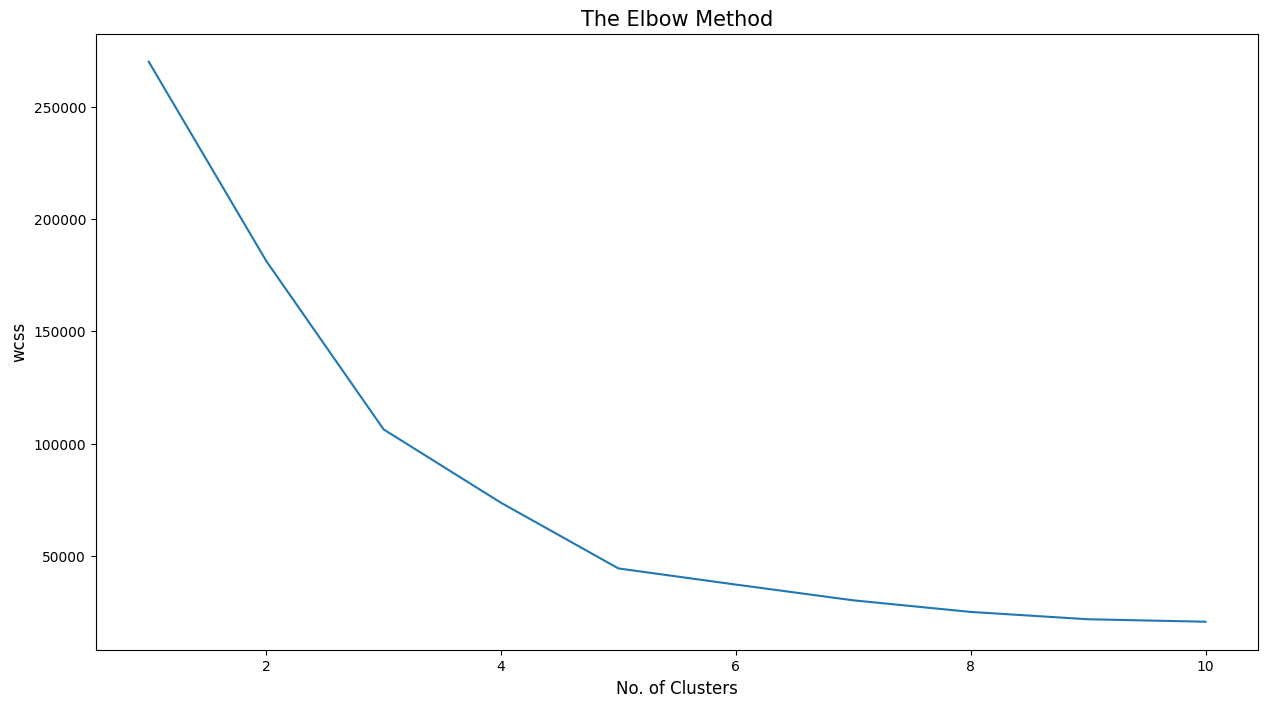

In [66]:
Income_Spend = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Income_Spend)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('wcss', fontsize = 12)
plt.show()   

##### This elbow method show a low slope line after 5 number of cluster so we can take 5 as optimum number of cluste

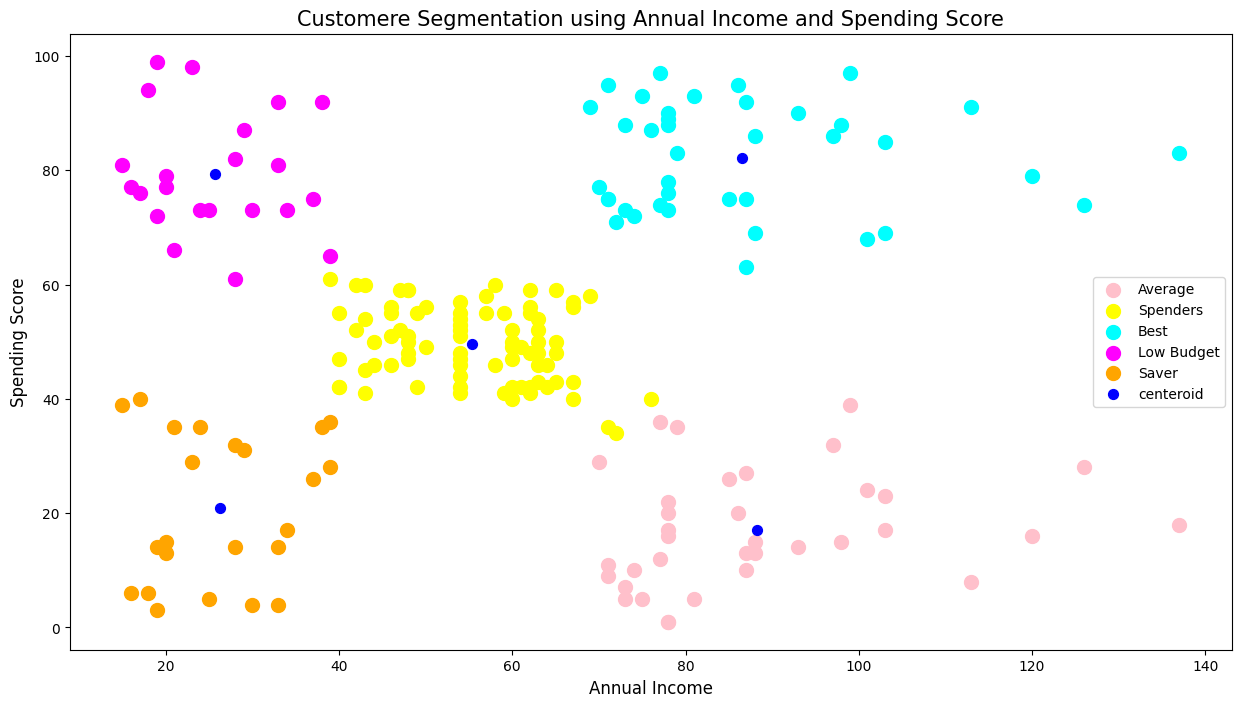

In [68]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Income_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Income_Spend[y_means == 0, 0], Income_Spend[y_means == 0, 1], s = 100, c = 'pink', label = 'Average')
plt.scatter(Income_Spend[y_means == 1, 0], Income_Spend[y_means == 1, 1], s = 100, c = 'yellow', label = 'Spenders')
plt.scatter(Income_Spend[y_means == 2, 0], Income_Spend[y_means == 2, 1], s = 100, c = 'cyan', label = 'Best')
plt.scatter(Income_Spend[y_means == 3, 0], Income_Spend[y_means == 3, 1], s = 100, c = 'magenta', label = 'Low Budget')
plt.scatter(Income_Spend[y_means == 4, 0], Income_Spend[y_means == 4, 1], s = 100, c = 'orange', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

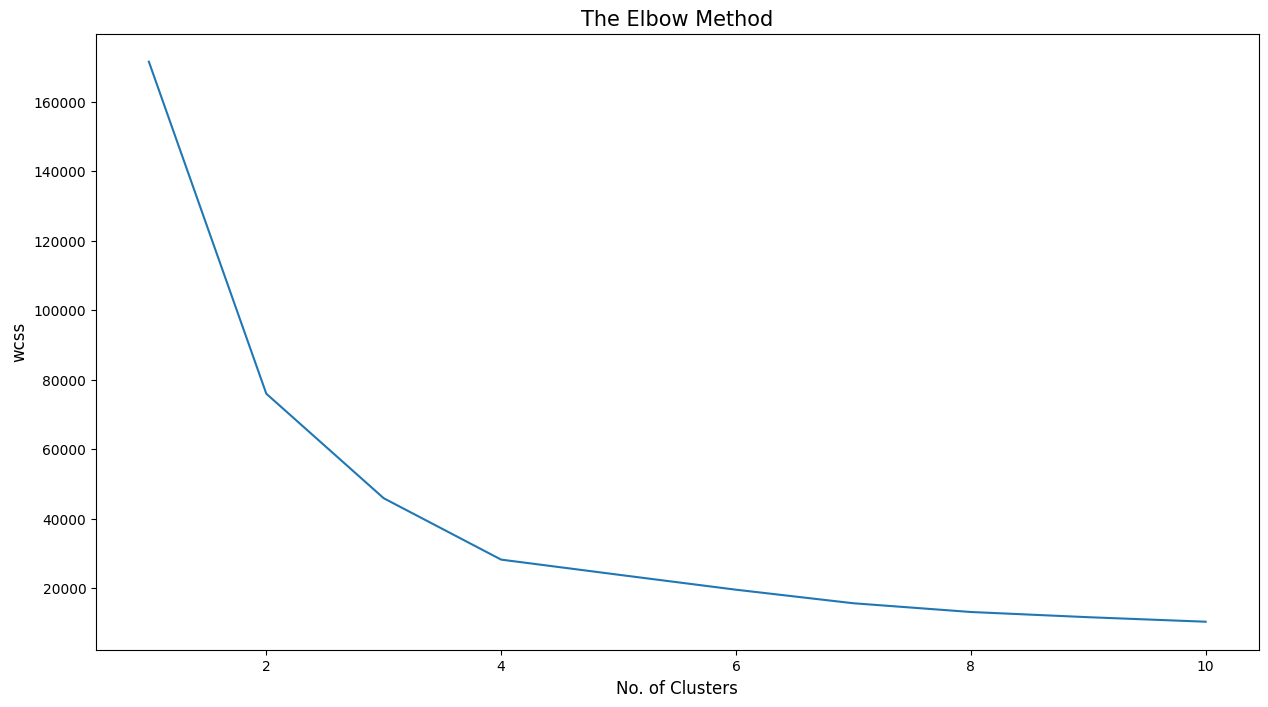

In [70]:
Age_Spend = [['Age' , 'Spending Score (1-100)']].iloc[: , :].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Age_Spend)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('wcss', fontsize = 12)
plt.show()  

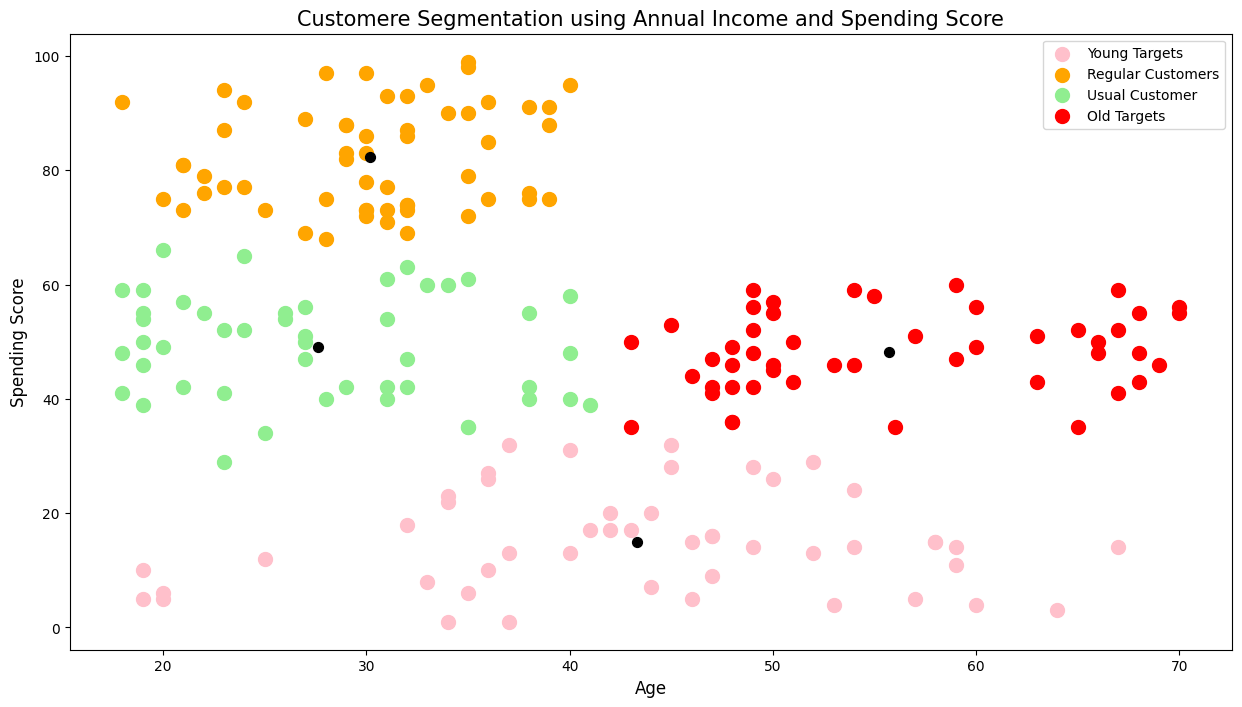

In [71]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = km.fit_predict(Age_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Age_Spend[ymeans == 0, 0], Age_Spend[ymeans == 0, 1], s = 100, c = 'pink', label = 'Young Targets' )
plt.scatter(Age_Spend[ymeans == 1, 0], Age_Spend[ymeans == 1, 1], s = 100, c = 'orange', label = 'Regular Customers')
plt.scatter(Age_Spend[ymeans == 2, 0], Age_Spend[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Usual Customer')
plt.scatter(Age_Spend[ymeans == 3, 0], Age_Spend[ymeans == 3, 1], s = 100, c = 'red', label = 'Old Targets')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'black')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

In [96]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Create the KMeans model with the optimal number of clusters (assumed to be 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Calculate the mean values of Age, Annual Income, and Score for each cluster

df['Cluster'] = labels
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,40,87,17
4,25,26,78


## Interpretation of Results and Communication

######  In this project, we have performed customer segmentation using clustering. We started with exploratory data analysis, where we examined the distributions of the features and their relationships with each other. We then preprocessed the data by scaling the features, which is a necessary step before performing clustering.
Exploratory Data Analysis (EDA): We started by examining the distributions of the features and their relationships with each other. This gave us an understanding of the structure of our data. Data Preprocessing: We scaled the features, which is a necessary step before performing clustering. This ensures that all features have equal weight in the clustering algorithm.

Clustering: We used the KMeans algorithm to perform the clustering. We chose the number of clusters based on the silhouette score, which measures the quality of the clustering.

Cluster Interpretation and Visualization: We interpreted the clusters by examining the average values of the features within each cluster. We also visualized the clusters using scatter plots. We used the KMeans algorithm to perform the clustering, and we validated the clusters. We found that the optimal number of clusters was 5, which we then interpreted and visualized.

The results of this project can provide valuable insights for the marketing team. For example, they can target their marketing campaigns to the different segments of customers, based on their characteristics. They can also use this information to develop new products or services that cater to the specific needs and preferences of each segment.

The clusters we’ve identified provide a clear picture of different customer segments based on their income and spending habits. Here’s a simplified breakdown:
Low income, low spending: Customers with an annual income between 20 and 40k and a spending score between 0 and 40. They have lower incomes and tend to spend less.

High income, low spending: Customers with an annual income between 55 and 140k and a spending score between 0 and 40. Despite their higher incomes, they tend to spend less.

Medium income, medium spending: Customers with an annual income between 40 and 80k and a spending score between 40 and 60. These customers have moderate incomes and spending habits. This is the most concentrated cluster, indicating a large number of customers fall into this category.

Low income, high spending: Customers with an annual income between 20 and 40k and a spending score between 60 and 100. Interestingly, these customers have lower incomes but tend to spend more.

High income, high spending: Customers with an annual income between 70 and 140k and a spending score between 60 and 100. These customers have higher incomes and also tend to spend more.